In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_uniform_grid_points(num_theta=20, num_phi=10):
    """
    在单位球面上生成近似均匀分布的点。
    首先等间隔选择 theta，然后选择 phi 使得 cos(phi) 均匀分布。

    Args:
        num_theta (int): 方位角 theta 的数量。
        num_phi (int): 极角 phi 的数量 (对应每个 theta)。

    Returns:
        tuple: (points_xyz, points_spherical)
               points_xyz (np.ndarray): 形状 (num_theta * num_phi, 3) 的笛卡尔坐标。
               points_spherical (np.ndarray): 形状 (num_theta * num_phi, 2) 的球坐标 (theta, phi)。
                                            theta: 方位角 [0, 2*pi)
                                            phi: 极角 [0, pi] (从 +Z 轴度量)
    """
    N = num_theta
    M = num_phi
    total_points = N * M

    # 1. 生成等间隔的 theta 值 [0, 2*pi)
    thetas = np.linspace(0, 2 * np.pi, N, endpoint=False)

    # 2. 生成使得 cos(phi) 均匀分布的 phi 值
    # 计算 cos(phi) 的采样值 z_k (每个子区间中点)
    k = np.arange(M) # 0 to M-1
    z_k = -1 + (k + 0.5) * (2.0 / M) # M 个 cos(phi) 的值，范围在 (-1, 1) 内
    # 限制在 [-1, 1] 防止数值误差
    z_k = np.clip(z_k, -1.0, 1.0)
    # 计算对应的 phi 值
    phis = np.arccos(z_k) # M 个 phi 的值，范围在 (0, pi) 内

    # 3. 组合 theta 和 phi
    # 使用 meshgrid 创建所有组合
    theta_grid, phi_grid = np.meshgrid(thetas, phis) # phi_grid 变化快, theta_grid 变化慢

    # 展平成一维数组
    theta_flat = theta_grid.ravel() # shape (N*M,)
    phi_flat = phi_grid.ravel()     # shape (N*M,)

    points_spherical = np.stack((theta_flat, phi_flat), axis=-1)

    # 4. 转换为笛卡尔坐标 (单位球 r=1)
    x = np.sin(phi_flat) * np.cos(theta_flat)
    y = np.sin(phi_flat) * np.sin(theta_flat)
    z = np.cos(phi_flat)
    points_xyz = np.stack((x, y, z), axis=-1)

    return points_xyz, points_spherical

Generated 200 points (20 thetas x 10 phis).

For theta ≈ 1.5708 (index 5):
  The corresponding 10 phi values are (sorted):
  [0.45102681 0.79539883 1.04719755 1.26610367 1.47062891 1.67096375
 1.87548898 2.0943951  2.34619382 2.69056584]


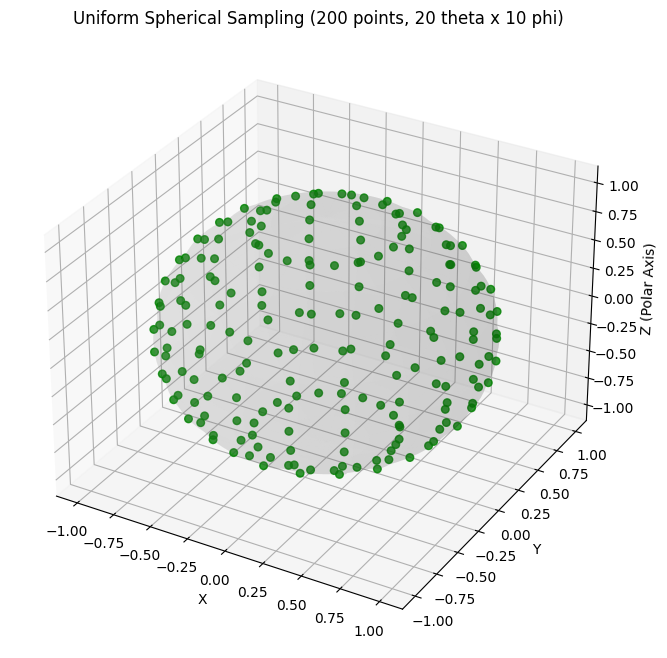

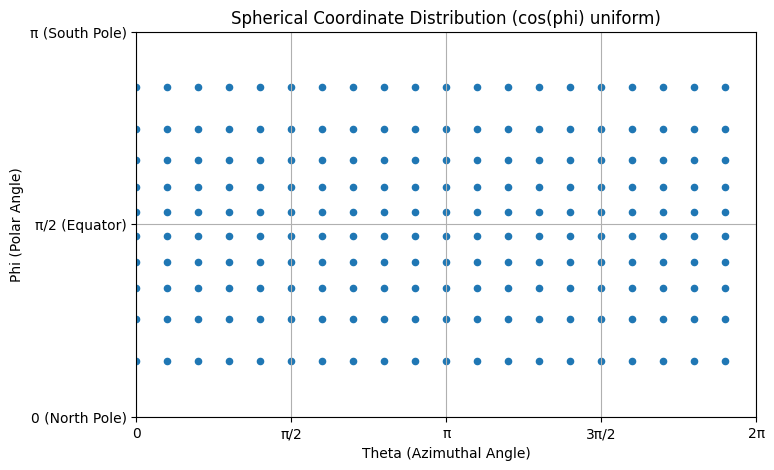

In [6]:
N_theta = 20
N_phi = 10
total_N = N_theta * N_phi

points_xyz, points_spherical = generate_uniform_grid_points(N_theta, N_phi)

# print(f"Generated {len(points_xyz)} points ({N_theta} thetas x {N_phi} phis).") # English print statement
print(f"Generated {len(points_xyz)} points ({N_theta} thetas x {N_phi} phis).")

# --- Check phi values for a specific theta ---
# Since theta is generated at equal intervals, we can index directly
target_theta_index = 5 # Example: the 6th theta value (0-indexed)
target_theta_value = np.linspace(0, 2 * np.pi, N_theta, endpoint=False)[target_theta_index]

# print(f"\nFor theta ≈ {target_theta_value:.4f} (index {target_theta_index}):") # English print statement
print(f"\nFor theta ≈ {target_theta_value:.4f} (index {target_theta_index}):")
# The indices for these points range from [target_theta_index * N_phi, (target_theta_index + 1) * N_phi)
# But an easier way to find them due to meshgrid ravel order is:
phis_for_theta = points_spherical[points_spherical[:, 0] == target_theta_value][:, 1]
# Alternatively, since we know the set of phi values is fixed:
phis_set = np.arccos(np.clip(-1 + (np.arange(N_phi) + 0.5) * (2.0 / N_phi), -1.0, 1.0))
# print(f"  The corresponding {len(phis_set)} phi values are (sorted):\n  {np.sort(phis_set)}") # English print statement
print(f"  The corresponding {len(phis_set)} phi values are (sorted):\n  {np.sort(phis_set)}")


# --- 3D Visualization ---
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_xyz[:, 0], points_xyz[:, 1], points_xyz[:, 2], s=30, c='green', alpha=0.8)

# Draw reference sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 50)
x_sph = np.outer(np.cos(u), np.sin(v))
y_sph = np.outer(np.sin(u), np.sin(v))
z_sph = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_sph, y_sph, z_sph, color='grey', alpha=0.1, rstride=5, cstride=5, linewidth=0)

ax.set_xlabel('X') # English label
ax.set_ylabel('Y') # English label
ax.set_zlabel('Z (Polar Axis)') # English label
ax.set_title(f'Uniform Spherical Sampling ({total_N} points, {N_theta} theta x {N_phi} phi)') # English title
ax.set_aspect('auto')
plt.show()

# --- 2D Angle Visualization ---
fig_angles, ax_angles = plt.subplots(figsize=(8, 5))
ax_angles.scatter(points_spherical[:, 0], points_spherical[:, 1], s=20)
ax_angles.set_xlabel('Theta (Azimuthal Angle)') # English label
ax_angles.set_ylabel('Phi (Polar Angle)')     # English label
ax_angles.set_title('Spherical Coordinate Distribution (cos(phi) uniform)') # English title
ax_angles.set_xlim(0, 2 * math.pi)
ax_angles.set_xticks(np.linspace(0, 2*math.pi, 5))
ax_angles.set_xticklabels(['0', 'π/2', 'π', '3π/2', '2π']) # Keep labels as they are standard notation
ax_angles.set_ylim(0, math.pi)
ax_angles.set_yticks(np.linspace(0, math.pi, 3))
ax_angles.set_yticklabels(['0 (North Pole)', 'π/2 (Equator)', 'π (South Pole)']) # English descriptions
ax_angles.grid(True)
plt.show()

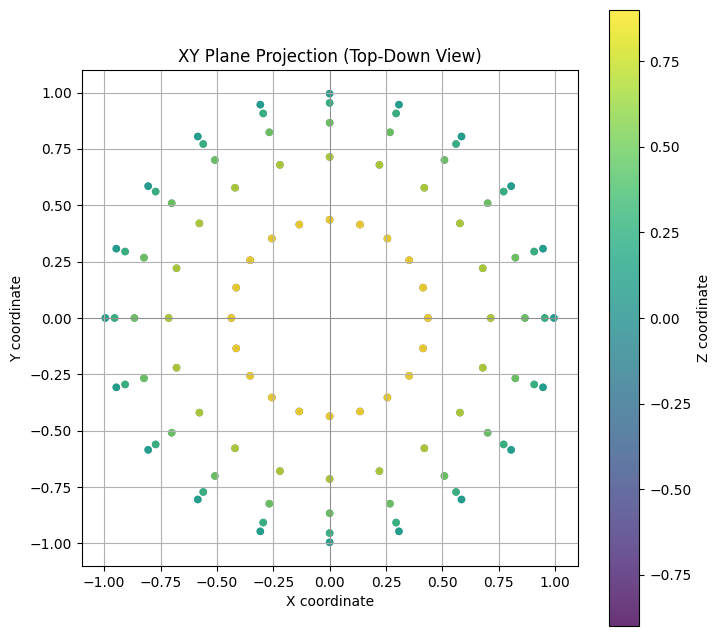

In [7]:
fig_xy, ax_xy = plt.subplots(figsize=(8, 8)) # Create a new figure and axes
ax_xy.scatter(points_xyz[:, 0], points_xyz[:, 1], # Plot X vs Y
                s=20, c=points_xyz[:, 2], cmap='viridis', # Color by Z coordinate
                alpha=0.8)

# Add a colorbar
cbar = fig_xy.colorbar(ax_xy.collections[0], ax=ax_xy)
cbar.set_label('Z coordinate')

ax_xy.set_xlabel('X coordinate')
ax_xy.set_ylabel('Y coordinate')
ax_xy.set_title('XY Plane Projection (Top-Down View)')
ax_xy.set_xlim([-1.1, 1.1]) # Set limits for unit circle projection
ax_xy.set_ylim([-1.1, 1.1])
ax_xy.set_aspect('equal', adjustable='box') # Ensure the projection is circular
ax_xy.grid(True)
ax_xy.axhline(0, color='grey', lw=0.5)
ax_xy.axvline(0, color='grey', lw=0.5)

plt.show() # Show all figures

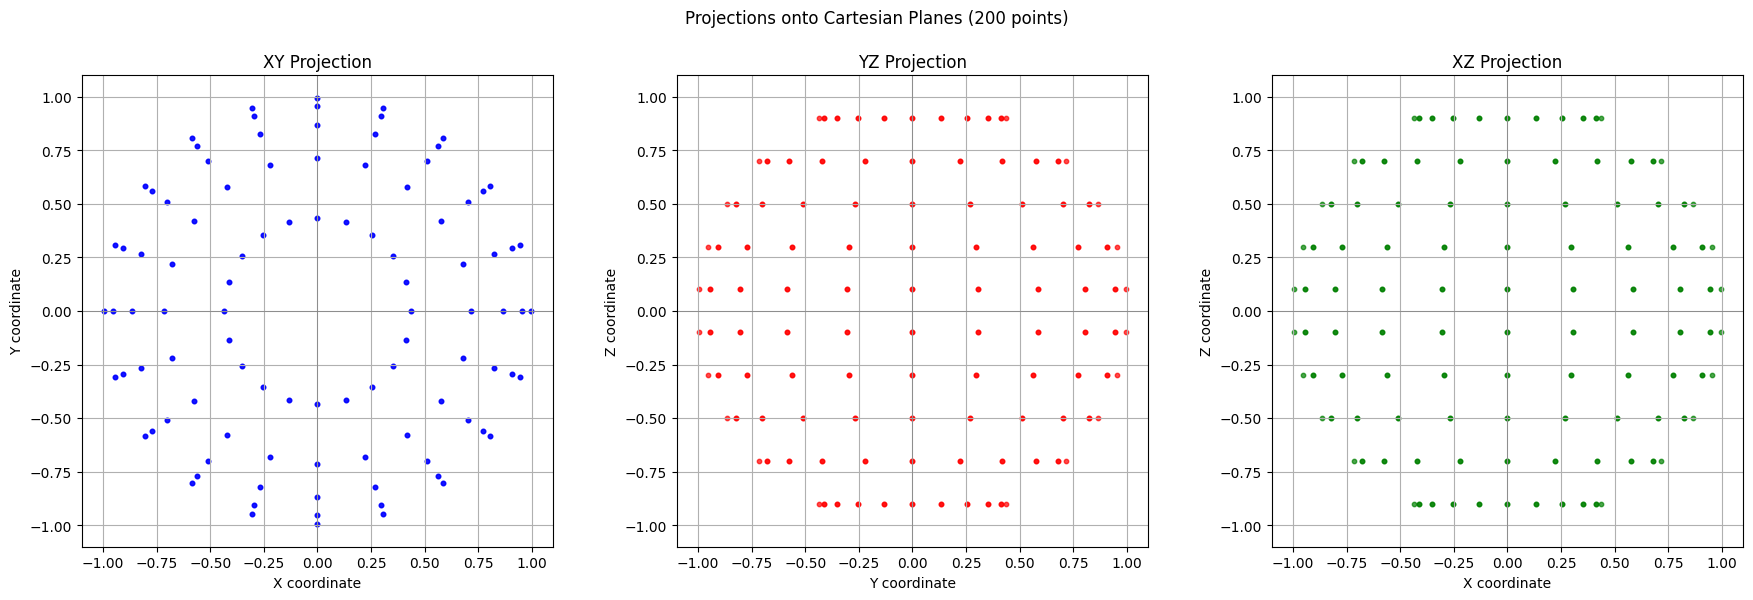

In [8]:
# --- 可视化三个平面投影 ---
fig_proj, axes_proj = plt.subplots(1, 3, figsize=(18, 6)) # 1 row, 3 columns for projections
fig_proj.suptitle(f'Projections onto Cartesian Planes ({total_N} points)')

# 提取坐标
x_coords = points_xyz[:, 0]
y_coords = points_xyz[:, 1]
z_coords = points_xyz[:, 2]

# 1. XY 平面投影 (ax 0)
axes_proj[0].scatter(x_coords, y_coords, s=10, alpha=0.7, c='blue')
axes_proj[0].set_title('XY Projection')
axes_proj[0].set_xlabel('X coordinate')
axes_proj[0].set_ylabel('Y coordinate')
axes_proj[0].set_xlim([-1.1, 1.1])
axes_proj[0].set_ylim([-1.1, 1.1])
axes_proj[0].set_aspect('equal', adjustable='box')
axes_proj[0].grid(True)
axes_proj[0].axhline(0, color='grey', lw=0.5)
axes_proj[0].axvline(0, color='grey', lw=0.5)

# 2. YZ 平面投影 (ax 1) - Y on horizontal, Z on vertical
axes_proj[1].scatter(y_coords, z_coords, s=10, alpha=0.7, c='red')
axes_proj[1].set_title('YZ Projection')
axes_proj[1].set_xlabel('Y coordinate')
axes_proj[1].set_ylabel('Z coordinate')
axes_proj[1].set_xlim([-1.1, 1.1])
axes_proj[1].set_ylim([-1.1, 1.1])
axes_proj[1].set_aspect('equal', adjustable='box')
axes_proj[1].grid(True)
axes_proj[1].axhline(0, color='grey', lw=0.5)
axes_proj[1].axvline(0, color='grey', lw=0.5)

# 3. XZ 平面投影 (ax 2) - X on horizontal, Z on vertical
axes_proj[2].scatter(x_coords, z_coords, s=10, alpha=0.7, c='green')
axes_proj[2].set_title('XZ Projection')
axes_proj[2].set_xlabel('X coordinate')
axes_proj[2].set_ylabel('Z coordinate')
axes_proj[2].set_xlim([-1.1, 1.1])
axes_proj[2].set_ylim([-1.1, 1.1])
axes_proj[2].set_aspect('equal', adjustable='box')
axes_proj[2].grid(True)
axes_proj[2].axhline(0, color='grey', lw=0.5)
axes_proj[2].axvline(0, color='grey', lw=0.5)

# 调整子图布局
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Leave space for suptitle
plt.show()

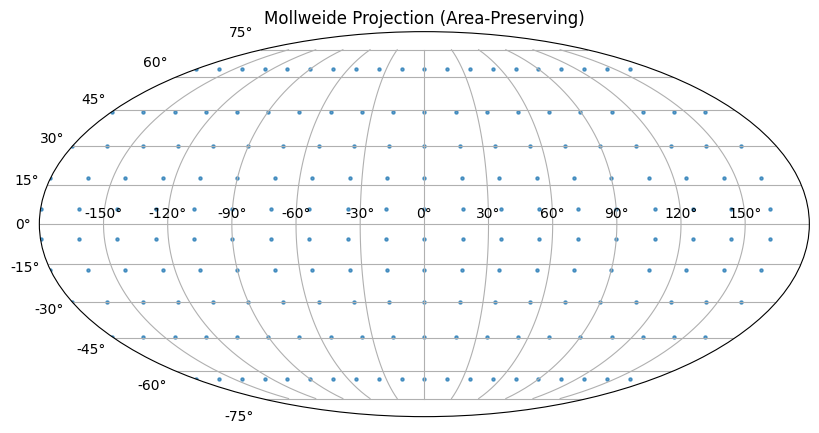

In [9]:
# --- 1. 面积保持投影 (Mollweide) ---
fig_mollweide = plt.figure(figsize=(10, 5))
ax_mollweide = fig_mollweide.add_subplot(111, projection='mollweide')

# Mollweide 需要经度 (longitude) 和纬度 (latitude)
# 经度 lon: 对应 theta，但范围通常是 [-pi, pi]
# 纬度 lat: 对应 pi/2 - phi，范围是 [-pi/2, pi/2]
theta = points_spherical[:, 0]
phi = points_spherical[:, 1]

longitude = theta - np.pi # 转换到 [-pi, pi]
latitude = np.pi/2 - phi   # 转换到 [-pi/2, pi/2]

ax_mollweide.scatter(longitude, latitude, s=5, alpha=0.7)
ax_mollweide.set_title("Mollweide Projection (Area-Preserving)")
ax_mollweide.grid(True)
plt.show()

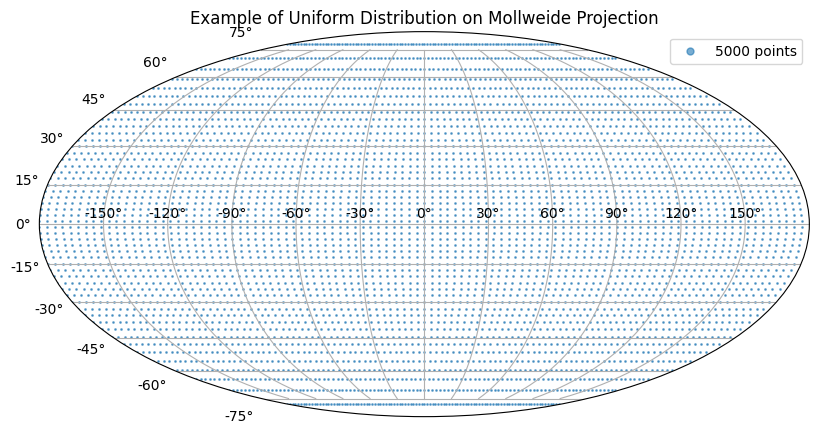

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

# --- 使用之前的函数生成更多的点，以更好地模拟均匀性 ---
def generate_uniform_grid_points(num_theta=100, num_phi=50): # 使用更多点
    N = num_theta
    M = num_phi
    thetas = np.linspace(0, 2 * np.pi, N, endpoint=False)
    k = np.arange(M)
    z_k = -1 + (k + 0.5) * (2.0 / M)
    z_k = np.clip(z_k, -1.0, 1.0)
    phis = np.arccos(z_k)
    theta_grid, phi_grid = np.meshgrid(thetas, phis)
    theta_flat = theta_grid.ravel()
    phi_flat = phi_grid.ravel()
    return theta_flat, phi_flat

theta_uniform, phi_uniform = generate_uniform_grid_points(num_theta=100, num_phi=50) # 生成 5000 个点

# --- 绘制 Mollweide 投影图 ---
fig_mollweide_ideal = plt.figure(figsize=(10, 5))
ax_mollweide_ideal = fig_mollweide_ideal.add_subplot(111, projection='mollweide')

# 转换到经纬度
longitude = theta_uniform - np.pi # 转换到 [-pi, pi]
latitude = np.pi/2 - phi_uniform   # 转换到 [-pi/2, pi/2]

# 绘制散点图
ax_mollweide_ideal.scatter(longitude, latitude, s=1, alpha=0.6, label=f'{len(theta_uniform)} points') # 使用更小的点
ax_mollweide_ideal.set_title("Example of Uniform Distribution on Mollweide Projection")
ax_mollweide_ideal.grid(True)
ax_mollweide_ideal.legend(markerscale=5) # Make legend marker larger

plt.show()

Generated 500 Fibonacci points.


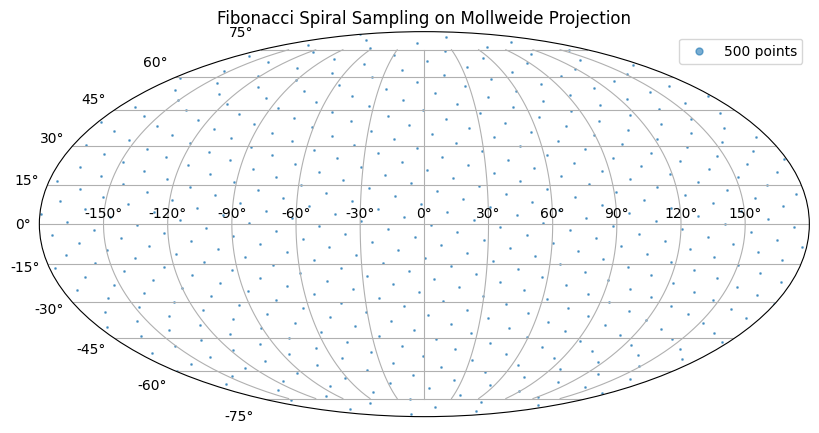

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt
# 斐波那契采样函数（需要确保这个函数已定义或从之前代码复制过来）
def generate_fibonacci_sphere_points(n_points=20):
    points_xyz = np.zeros((n_points, 3))
    points_spherical = np.zeros((n_points, 2))
    phi_gr = (1 + math.sqrt(5)) / 2
    for i in range(n_points):
        y = 1 - (2 * (i + 0.5)) / n_points
        y = np.clip(y, -1.0, 1.0)
        phi = math.acos(y)
        theta = (2 * math.pi * i) / phi_gr
        theta = theta % (2 * math.pi)
        points_spherical[i, 0] = theta
        points_spherical[i, 1] = phi
        radius_xy = math.sin(phi)
        x = radius_xy * math.cos(theta)
        y_cart = radius_xy * math.sin(theta)
        z = math.cos(phi)
        points_xyz[i, :] = [x, y_cart, z]
    return points_xyz, points_spherical

# --- 生成斐波那契采样点 ---
N_fibonacci = 500 # 使用较多的点以观察均匀性
points_xyz_fib, points_spherical_fib = generate_fibonacci_sphere_points(N_fibonacci)

print(f"Generated {len(points_xyz_fib)} Fibonacci points.")

# --- 绘制 Mollweide 投影图 ---
fig_mollweide_fib = plt.figure(figsize=(10, 5))
ax_mollweide_fib = fig_mollweide_fib.add_subplot(111, projection='mollweide')

# 转换到 Mollweide 需要的经纬度
theta_fib = points_spherical_fib[:, 0] # Azimuthal [0, 2*pi)
phi_fib = points_spherical_fib[:, 1]   # Polar [0, pi]

longitude_fib = theta_fib - np.pi # Convert to longitude [-pi, pi]
latitude_fib = np.pi/2 - phi_fib   # Convert to latitude [-pi/2, pi/2]

# 绘制散点图
ax_mollweide_fib.scatter(longitude_fib, latitude_fib,
                         s=1,            # Use small points
                         alpha=0.6,      # Add transparency
                         label=f'{N_fibonacci} points')
ax_mollweide_fib.set_title("Fibonacci Spiral Sampling on Mollweide Projection")
ax_mollweide_fib.grid(True)
ax_mollweide_fib.legend(markerscale=5) # Make legend marker larger

plt.show()

生成了 200 个点 (20 a a 10 phi)。


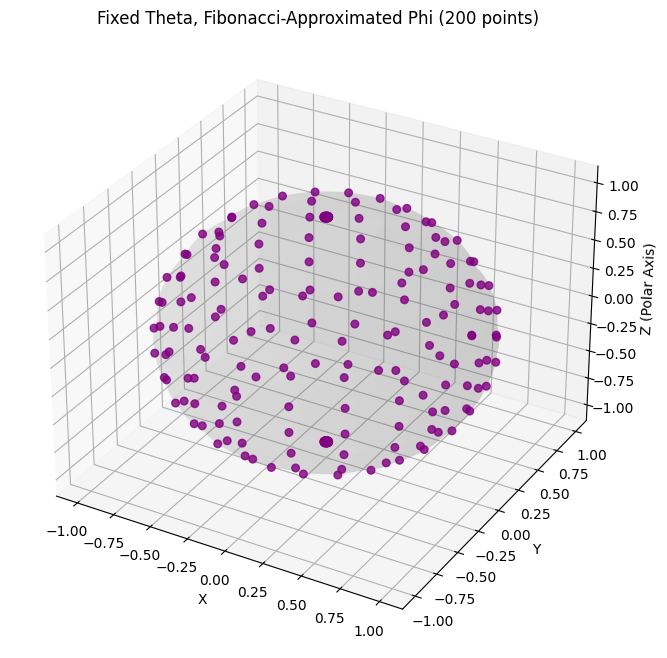

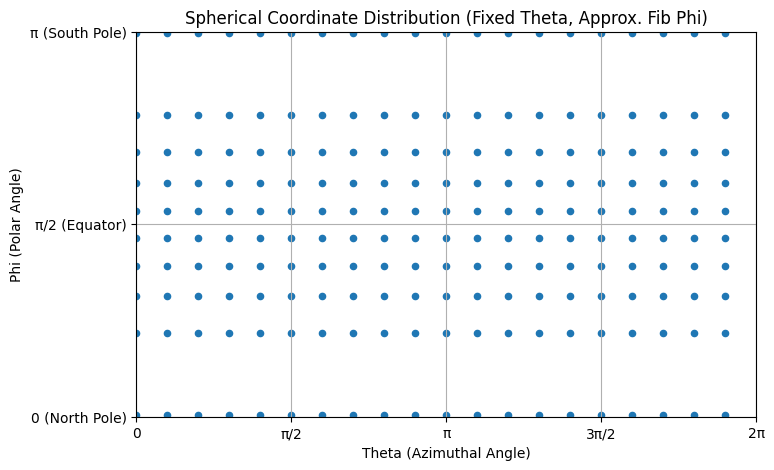

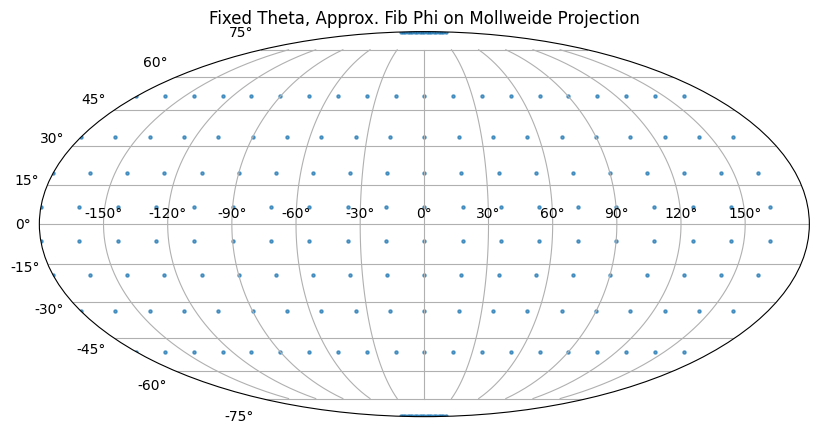

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 需要之前的斐波那契生成函数 ---
def generate_fibonacci_sphere_points(n_points=20):
    # ...(函数体如上一个回答所示)...
    points_xyz = np.zeros((n_points, 3))
    points_spherical = np.zeros((n_points, 2))
    phi_gr = (1 + math.sqrt(5)) / 2
    for i in range(n_points):
        y = 1 - (2 * (i + 0.5)) / n_points
        y = np.clip(y, -1.0, 1.0)
        phi = math.acos(y)
        theta = (2 * math.pi * i) / phi_gr
        theta = theta % (2 * math.pi)
        points_spherical[i, 0] = theta
        points_spherical[i, 1] = phi
        radius_xy = math.sin(phi)
        x = radius_xy * math.cos(theta)
        y_cart = radius_xy * math.sin(theta)
        z = math.cos(phi)
        points_xyz[i, :] = [x, y_cart, z]
    return points_xyz, points_spherical
# --- End function definition ---


def generate_fixed_theta_fib_approx_points(num_theta=20, num_phi_per_theta=10, num_fib_samples=10000):
    """
    生成点，其中 theta 是等间隔的，phi 的选择试图近似斐波那ċċi分布。

    Args:
        num_theta (int): 方位角 theta 的数量。
        num_phi_per_theta (int): 每个 theta 对应的极角 phi 的数量。
        num_fib_samples (int): 用于估计 phi 分布的斐波那契样本数量。

    Returns:
        tuple: (points_xyz, points_spherical)
               points_xyz (np.ndarray): shape (num_theta * num_phi_per_theta, 3)
               points_spherical (np.ndarray): shape (num_theta * num_phi_per_theta, 2) (theta, phi)
    """
    N = num_theta
    M = num_phi_per_theta
    total_points = N * M

    # 1. 生成大量斐波那契点以获取 phi 分布
    _, points_spherical_large = generate_fibonacci_sphere_points(num_fib_samples)
    phis_fib_large_sorted = np.sort(points_spherical_large[:, 1]) # 对 phi 值排序

    # 2. 生成等间隔的目标 theta 值
    target_thetas = np.linspace(0, 2 * np.pi, N, endpoint=False)

    # 3. 为每个 theta 选择 phi (从排序后的斐波那契 phi 中取等百分位点)
    # 计算要选取的百分位索引
    indices = np.linspace(0, num_fib_samples - 1, M, dtype=int) # 在大样本中取 M 个等间隔索引
    selected_phis = phis_fib_large_sorted[indices] # 这 M 个 phi 将用于所有 theta

    # 4. 组合 theta 和 phi
    theta_grid, phi_grid = np.meshgrid(target_thetas, selected_phis)
    theta_flat = theta_grid.ravel()
    phi_flat = phi_grid.ravel()
    points_spherical = np.stack((theta_flat, phi_flat), axis=-1)

    # 5. 转换为笛卡尔坐标 (单位球 r=1)
    x = np.sin(phi_flat) * np.cos(theta_flat)
    y = np.sin(phi_flat) * np.sin(theta_flat)
    z = np.cos(phi_flat)
    points_xyz = np.stack((x, y, z), axis=-1)

    return points_xyz, points_spherical


# --- 生成和可视化 ---
if __name__ == "__main__":
    N_theta = 20
    N_phi = 10
    total_N = N_theta * N_phi

    points_xyz, points_spherical = generate_fixed_theta_fib_approx_points(N_theta, N_phi)

    print(f"生成了 {len(points_xyz)} 个点 ({N_theta} a a {N_phi} phi)。")

    # --- 3D 可视化 ---
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points_xyz[:, 0], points_xyz[:, 1], points_xyz[:, 2], s=30, c='purple', alpha=0.8)

    # 绘制参考球面
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 50)
    x_sph = np.outer(np.cos(u), np.sin(v))
    y_sph = np.outer(np.sin(u), np.sin(v))
    z_sph = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x_sph, y_sph, z_sph, color='grey', alpha=0.1, rstride=5, cstride=5, linewidth=0)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z (Polar Axis)')
    ax.set_title(f'Fixed Theta, Fibonacci-Approximated Phi ({total_N} points)')
    ax.set_aspect('auto')
    plt.show()

    # --- 2D 角度可视化 ---
    fig_angles, ax_angles = plt.subplots(figsize=(8, 5))
    ax_angles.scatter(points_spherical[:, 0], points_spherical[:, 1], s=20)
    ax_angles.set_xlabel('Theta (Azimuthal Angle)')
    ax_angles.set_ylabel('Phi (Polar Angle)')
    ax_angles.set_title('Spherical Coordinate Distribution (Fixed Theta, Approx. Fib Phi)')
    ax_angles.set_xlim(0, 2 * math.pi)
    ax_angles.set_xticks(np.linspace(0, 2*math.pi, 5))
    ax_angles.set_xticklabels(['0', 'π/2', 'π', '3π/2', '2π'])
    ax_angles.set_ylim(0, math.pi)
    ax_angles.set_yticks(np.linspace(0, math.pi, 3))
    ax_angles.set_yticklabels(['0 (North Pole)', 'π/2 (Equator)', 'π (South Pole)'])
    ax_angles.grid(True)
    plt.show()

    # --- Mollweide 投影检查 ---
    fig_mollweide_approx = plt.figure(figsize=(10, 5))
    ax_mollweide_approx = fig_mollweide_approx.add_subplot(111, projection='mollweide')
    theta = points_spherical[:, 0]
    phi = points_spherical[:, 1]
    longitude = theta - np.pi
    latitude = np.pi/2 - phi
    ax_mollweide_approx.scatter(longitude, latitude, s=5, alpha=0.7)
    ax_mollweide_approx.set_title("Fixed Theta, Approx. Fib Phi on Mollweide Projection")
    ax_mollweide_approx.grid(True)
    plt.show()